# CS 237: Random variables and distributions

Topics covered in this notebook:

* Visualizing the PDF and CDF of random variables
* Visualizing the distributions covered in class (discrete: Bernoulli, uniform, binomial, geometric; continuous: uniform, exponential, normal)
* The normal approximation to the binomial distribution

In [45]:
import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting
import matplotlib.lines as mlines
import seaborn as sns             # Fancy plotting 
import pandas as pd               # Data input and manipulation
import math

from numpy.random import seed, randint, uniform
from collections import Counter

## Helper functions to plot the PDF and CDF

In [46]:
# get the PDF from the CDF (discrete random variable)
def get_pdf(cdf):
    pdf = [0 for i in range(len(cdf))]
    pdf[0] = cdf[0]
    for i in range(1, len(cdf)):
        pdf[i] = cdf[i] - cdf[i - 1]
    return pdf

# get the CDF from the PDF (discrete random variable)
def get_cdf(pdf):
    cdf = [0 for i in range(len(pdf))]
    cdf[0] = pdf[0]
    for i in range(1, len(pdf)):
        cdf[i] = cdf[i - 1] + pdf[i]
    return cdf

In [47]:
# plot the PDF of a discrete random variable

# plotted as a bar plot
def plot_pdf(values, pdf, title = "PDF"):
    plt.bar(values, pdf, tick_label=values, width=1.0,edgecolor='black')
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xticks(values, values)
    plt.show()
    
def plot_pdf_scatter(values, pdf, title = "PDF"):
    plt.scatter(values, pdf)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xticks(values, values)
    plt.show()

In [48]:
# adds a line segment to a plot
def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

# plot the CDF of a discrete random variable
# discontinuous plot
def plot_cdf(values, cdf, title = "CDF"):
    plt.scatter(values, cdf)    
    
    # plot the discontinuities
    jump_x = [values[i] for i in range(1, len(values))]
    jump_y = [cdf[i] for i in range(0, len(values) - 1)]
    plt.scatter(jump_x, jump_y, facecolors='none', color='C0')
    
    # finish the plot
    for i in range(0, len(values) - 1):
        plt.plot([values[i], jump_x[i]], [cdf[i], jump_y[i]], color='C0')

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("F(x)")
    plt.xticks(values, values)
    plt.show()

In [49]:
# plot the PDF and CDF of a continuous random variable

def plot_pdf_continuous(values, pdf, title = "PDF"):
    plt.fill_between(values, pdf, interpolate=True)
    plt.plot(values, pdf, color='k')
    plt.title(title)
    plt.ylabel("f(x)")
    plt.xlabel("x")
    plt.show()

def plot_cdf_continuous(values, cdf, title = "CDF"):
    plt.fill_between(values, cdf, interpolate=True)
    plt.plot(values, cdf, color='k')
    plt.title(title)
    plt.ylabel("F(x)")
    plt.xlabel("x")
    plt.show()

## Example: sum of two die rolls

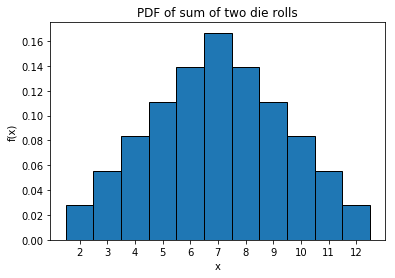

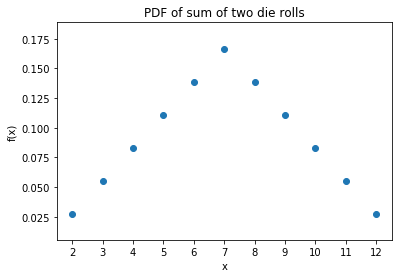

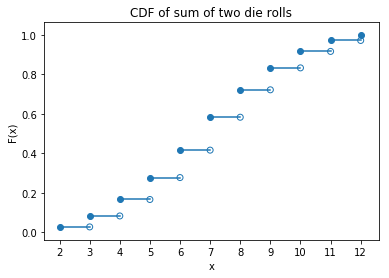

In [50]:
# sum of two die rolls
values = [i for i in range(2, 13)]
cdf = [1/36, 3/36, 6/36, 10/36, 15/36, 21/36, 26/36, 30/36, 33/36, 35/36, 1]
pdf = get_pdf(cdf)
plot_pdf(values, pdf, "PDF of sum of two die rolls")
plot_pdf_scatter(values, pdf, "PDF of sum of two die rolls")

plot_cdf(values, cdf, "CDF of sum of two die rolls")

## Example: number of tosses until heads

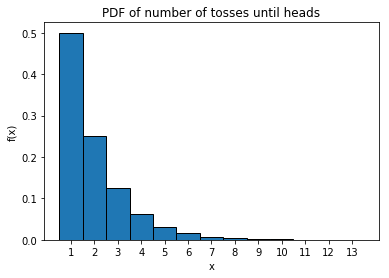

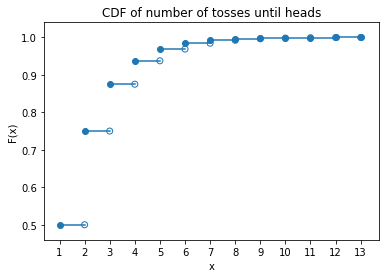

In [51]:
# number of tosses until heads
values = [i for i in range(1, 14)]
cdf = [float(1 - 1/2**i) for i in range(1, 14)]
pdf = get_pdf(cdf)
plot_pdf(values, pdf, "PDF of number of tosses until heads")
plot_cdf(values, cdf, "CDF of number of tosses until heads")

## Example: functions of random variables

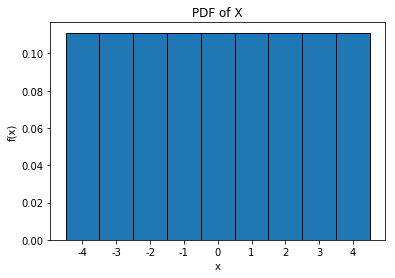

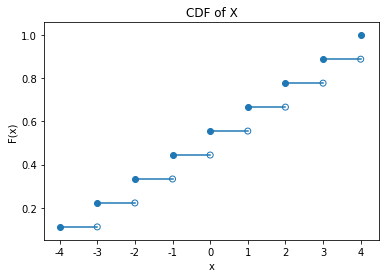

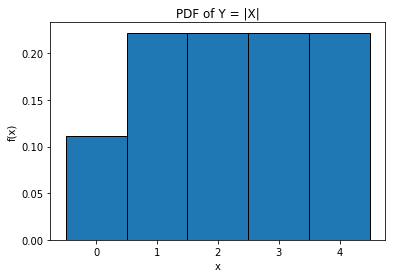

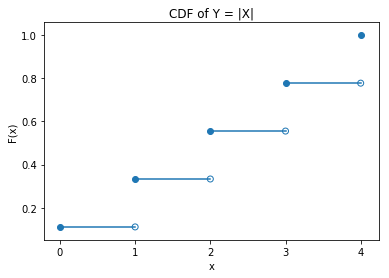

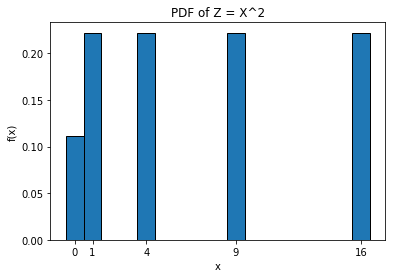

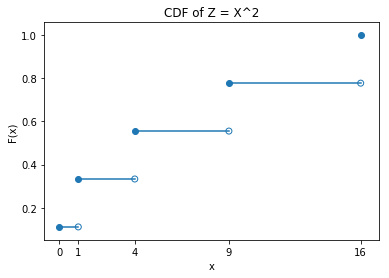

In [52]:
# functions of random variables example
# X
xval = [i for i in range(-4, 5)]
xpdf = [1/9 for i in range(-4, 5)]
xcdf = get_cdf(xpdf)
plot_pdf(xval, xpdf, "PDF of X")
plot_cdf(xval, xcdf, "CDF of X")

# Y = |X|
yval = [i for i in range(0, 5)]
ypdf = [1/9, 2/9, 2/9, 2/9, 2/9]
ycdf = get_cdf(ypdf)
plot_pdf(yval, ypdf, "PDF of Y = |X|")
plot_cdf(yval, ycdf, "CDF of Y = |X|")

# Z = X^2
zval = [i**2 for i in range(0, 5)]
zpdf = [1/9, 2/9, 2/9, 2/9, 2/9]
zcdf = get_cdf(zpdf)
plot_pdf(zval, zpdf, "PDF of Z = X^2")
plot_cdf(zval, zcdf, "CDF of Z = X^2")

## Bernoulli distribution

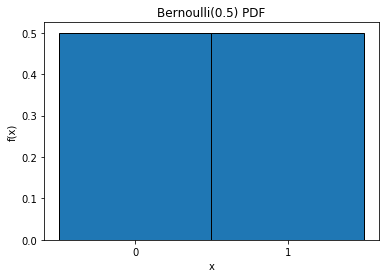

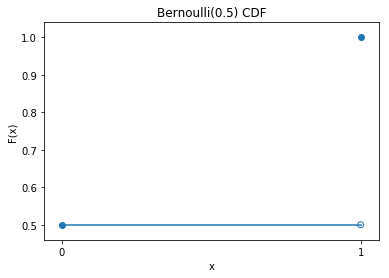

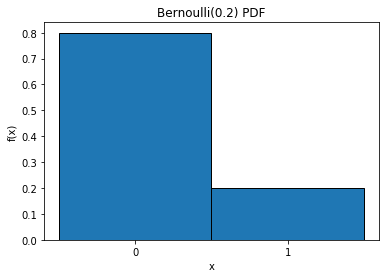

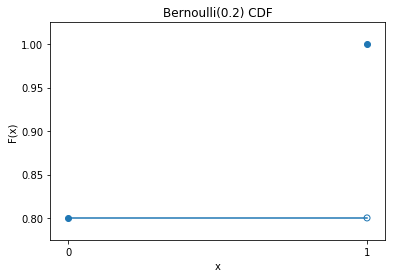

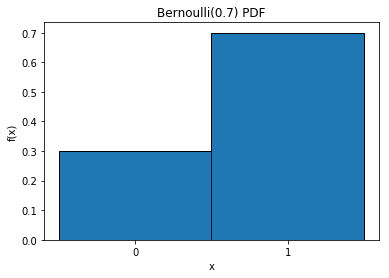

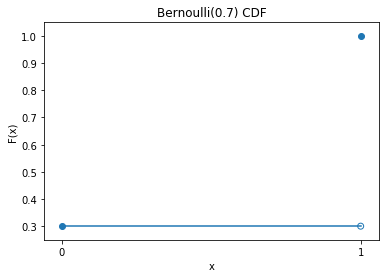

In [53]:
# Bernoulli distribution
def plot_bernoulli(p):
    values = [0, 1]
    pdf = [1-p, p]
    cdf = get_cdf(pdf)
    plot_pdf(values, pdf, "Bernoulli(" + str(p) + ") PDF")
    plot_cdf(values, cdf, "Bernoulli(" + str(p) + ") CDF")

plot_bernoulli(0.5)
plot_bernoulli(0.2)
plot_bernoulli(0.7)
# try your own examples

## Discrete uniform distribution

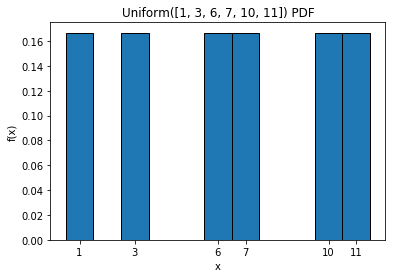

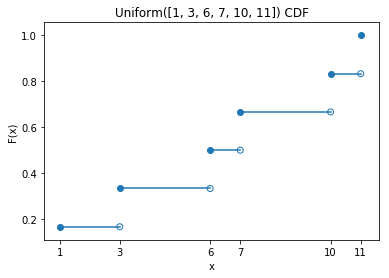

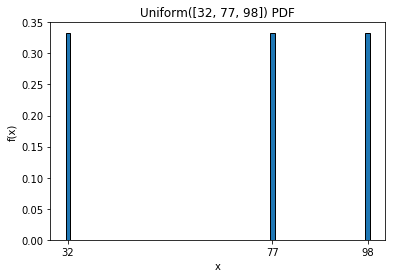

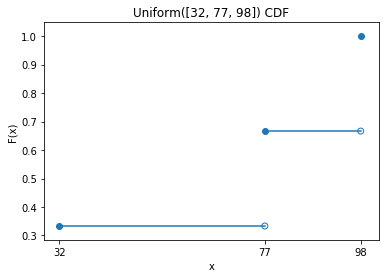

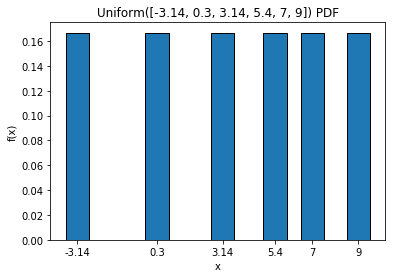

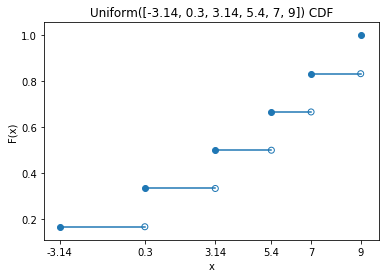

In [54]:
# discrete uniform plots
def plot_uniform_discrete(values):
    n = len(values)
    pdf = [1.0 / n for i in range(n)]
    cdf = get_cdf(pdf)
    plot_pdf(values, pdf, "Uniform(" + str(values) + ") PDF" )
    plot_cdf(values, cdf, "Uniform(" + str(values) + ") CDF" )

a = [1, 3, 6, 7, 10, 11]
b = [32, 77, 98]
c = [-3.14, 0.3, 3.14, 5.4, 7, 9]

plot_uniform_discrete(a)
plot_uniform_discrete(b)
plot_uniform_discrete(c)
# try your own examples

## Binomial distribution

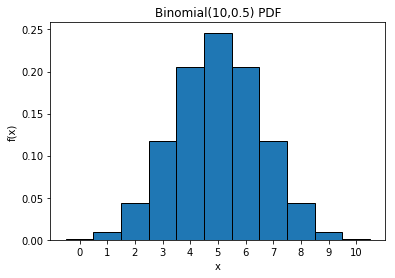

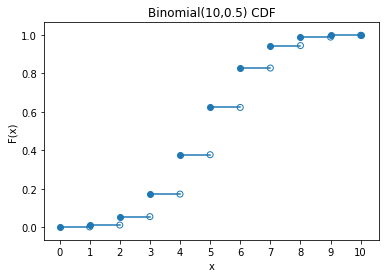

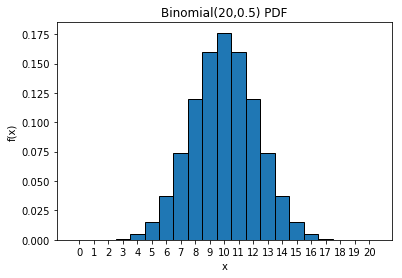

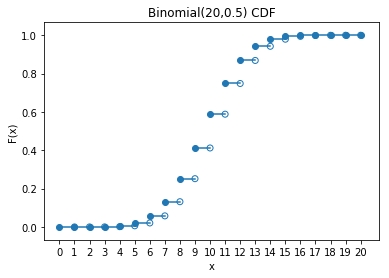

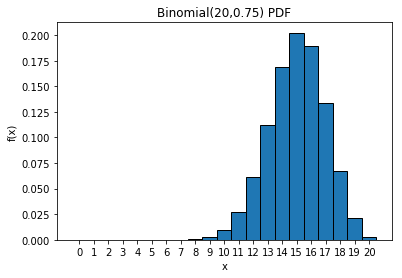

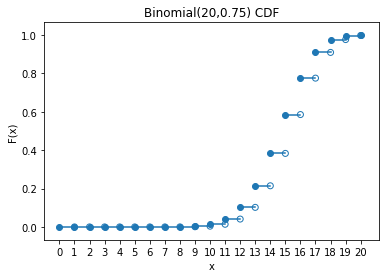

In [55]:
# binomial distribution

# N choose K, calculated efficiently using dynamic programming
def C(N, K):
    if(K > N):
        return 0
    if(K < N/2):
        K = N - K
    X = [1]*(K + 1)
    for row in range(1, N - K + 1):
        X[row] *= 2
        for col in range(row + 1, K + 1):
            X[col] = X[col] + X[col - 1]
    return X[K]

def binomial_pdf_evaluate(N,p,k):
    return C(N,k) * (1 - p)**(N - k) * (p**k)
    
def plot_binomial(N, p):
    values = list(range(N + 1))
    pdf = [ binomial_pdf_evaluate(N,p,k) for k in range(N+1)]
    cdf = get_cdf(pdf)
    plot_pdf(values, pdf, "Binomial(" + str(N) + "," + str(p) + ") PDF" )
    plot_cdf(values, cdf, "Binomial(" + str(N) + "," + str(p) + ") CDF" )

plot_binomial(10, 0.5)
plot_binomial(20, 0.5)
plot_binomial(20, 0.75)
# try your own examples

## Geometric distribution

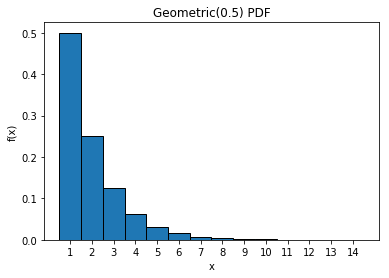

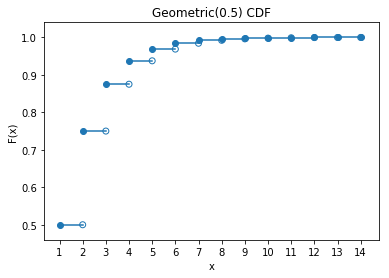

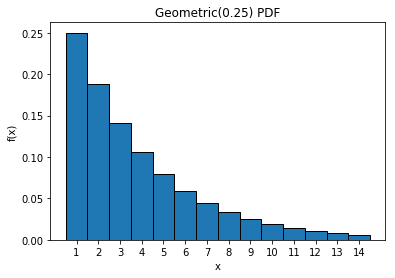

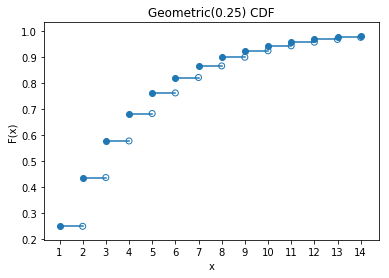

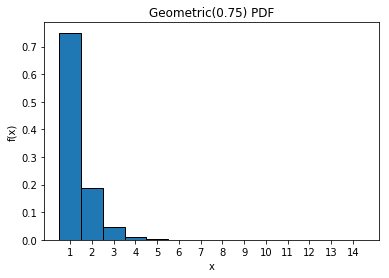

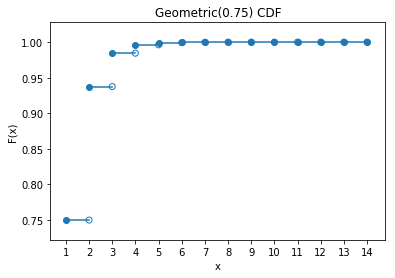

In [56]:
# geometric distribution
def plot_geometric(p, limit = 15):
    values = [i for i in range(1, limit)] 
    cdf = [float(1 - (1 - p)**i) for i in range(1, limit)]
    pdf = get_pdf(cdf)
    plot_pdf(values, pdf, "Geometric(" + str(p) + ") PDF")
    plot_cdf(values, cdf, "Geometric(" + str(p) + ") CDF")

plot_geometric(0.5)
plot_geometric(0.25)
plot_geometric(0.75)
# try your own examples

## Continuous uniform distribution

## Exponential distribution

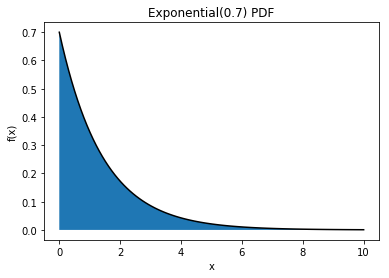

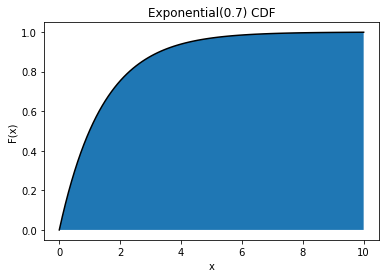

In [57]:
# exponential distribution

# evaluates the Exponential(lam) PDF at x
def exp_pdf_evaluate(lam, x):
    return lam*np.exp(-lam*x)

# evaluates the Exponential(lam) CDF at x
def exp_cdf_evaluate(lam, x):
    return 1.0 - np.exp(-lam*x)

def plot_exponential_pdf(lam, limit = 10):
    values = np.linspace(0,limit,100)
    pdf = [exp_pdf_evaluate(lam,x) for x in values]
    plot_pdf_continuous(values, pdf, 'Exponential(' + str(lam) + ') PDF')
    
def plot_exponential_cdf(lam, limit = 10):
    values = np.linspace(0,limit,100)
    cdf = [exp_cdf_evaluate(lam,x) for x in values]
    plot_cdf_continuous(values, cdf, 'Exponential(' + str(lam) + ') CDF')

def plot_exponential(lam, limit = 10):
    plot_exponential_pdf(lam, limit)
    plot_exponential_cdf(lam, limit)
    
plot_exponential(0.7)

## Normal distribution

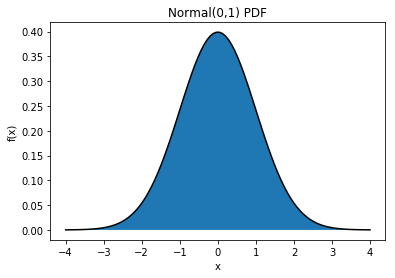

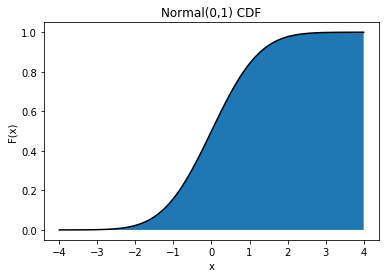

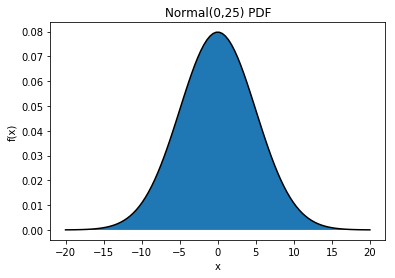

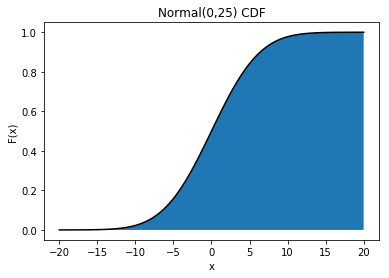

In [58]:
# normal distribution

def normal_pdf_evaluate(mu,var,x):
    return (1/(math.sqrt(var*2*math.pi))) * math.exp(-(x-mu)*(x-mu)/(2*var))
    
def normal_cdf_evaluate(mu,var,x):
    return (1 + math.erf((x-mu)/(var**0.5 * 2.0**0.5))) / 2
    
# limit = 4 means 4 standard deviations away on each side of the mean
def plot_normal_pdf(mu,var,limit=4):
    sigma = var**0.5
    values = np.linspace(mu-sigma*limit,mu+sigma*limit,100)
    pdf = [normal_pdf_evaluate(mu,var,x) for x in values]
    plot_pdf_continuous(values, pdf, "Normal(" + str(mu) + "," + str(var) + ") PDF")
    
def plot_normal_cdf(mu,var,limit=4):
    sigma = var**0.5
    values = np.linspace(mu-sigma*limit,mu+sigma*limit,100)
    cdf = [normal_cdf_evaluate(mu,var,x) for x in values]
    plot_cdf_continuous(values, cdf, "Normal(" + str(mu) + "," + str(var) + ") CDF")

plot_normal_pdf(0, 1)
plot_normal_cdf(0, 1)
plot_normal_pdf(0, 5*5)
plot_normal_cdf(0, 5*5)

## Normal approximation to the binomial

Here we plot the binomial distribution and the normal distribution with the same expectation and variance, i.e., Binomial(n,p) and Normal(np, np(1-p)).

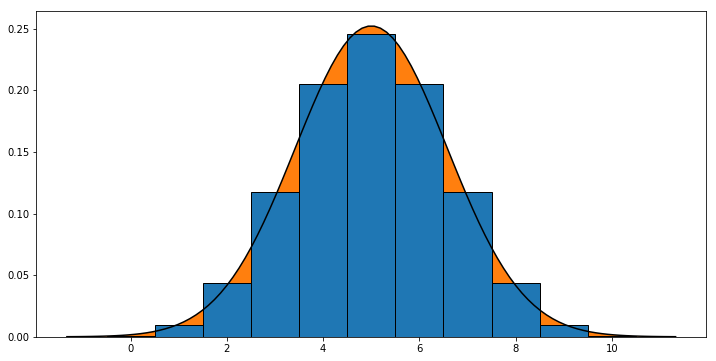

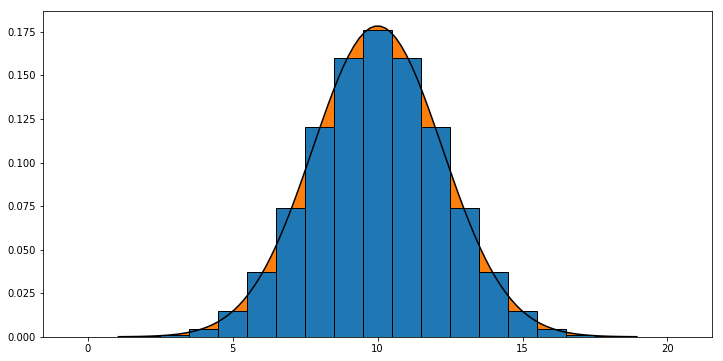

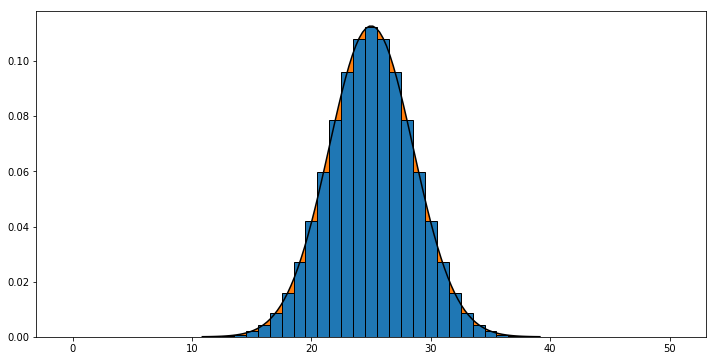

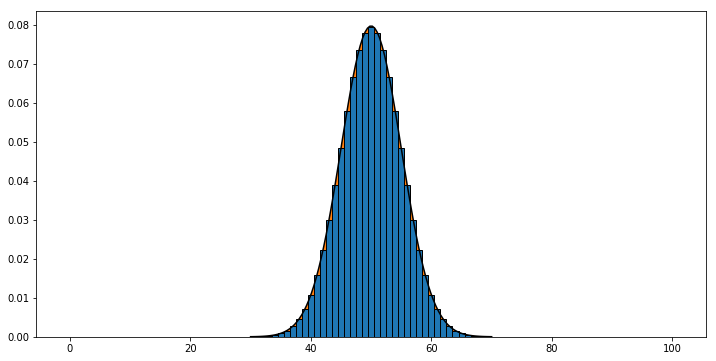

In [64]:
def plot_binomial_normal(n, p, limit=4):
    mu = n*p
    var = n*p*(1-p)
    sigma = var**0.5
    
    # make the figure larger
    plt.figure(figsize=(12,6))
    
    # plot the binomial pdf
    bin_values = [i for i in range(n + 1)]
    bin_pdf = [binomial_pdf_evaluate(n, p, i) for i in bin_values]
    plt.bar(bin_values, bin_pdf, width=1.0,edgecolor='black')
    
    # plot the normal pdf
    norm_values = np.linspace(mu-sigma*limit,mu+sigma*limit,100)
    norm_pdf = [normal_pdf_evaluate(mu,var,x) for x in norm_values]
    plt.fill_between(norm_values, norm_pdf, interpolate=True)
    plt.plot(norm_values, norm_pdf, color='k')

plot_binomial_normal(10, 0.5)
plot_binomial_normal(20, 0.5)
plot_binomial_normal(50, 0.5)
plot_binomial_normal(100, 0.5)